In [2]:
import pandas as pd 
import os 

Counter = 0
for sub in os.listdir("./Data_Raw"):
    print(sub, ": ")
    counter = 0
    for subsub in os.listdir(f"./Data_Raw/{sub}"):
        for file in os.listdir(f"./Data_Raw/{sub}/{subsub}"):
            x = len(pd.read_csv(f"./Data_Raw/{sub}/{subsub}/{file}", sep = "\t", encoding="utf-16"))
            counter += x
            Counter += x
    print(counter)
print("Total: ",Counter)

02800_5_Innlandet_direkte_OPS : 
142861
02800_5_Soer_Oest_direkte_OPS : 
184102
112_Innlandet : 
244314
112_Soer_Oest : 
503030
Total:  1074307


In [26]:
import pandas as pd
innlandet_112 = pd.read_csv("Data_Cleaned\\innlandet_112_clean.csv", parse_dates= ["Date_time"]) 
innlandet_02 = pd.read_csv("Data_Cleaned\\innlandet_02800_clean.csv", parse_dates= ["Date_time"]) 
sorost_112 = pd.read_csv("Data_Cleaned\\sorost_112_clean.csv", parse_dates= ["Date_time"]) 
sorost_02 = pd.read_csv("Data_Cleaned\\sorost_02800_clean.csv", parse_dates= ["Date_time"]) 

In [36]:
x = sorost_112.set_index("Date_time").resample("H").agg({"Answered" : "sum", "Missed":"sum","Missdialed" : "sum","Calls": "sum", "Waiting_time": "mean", "Call_duration": "mean", "Total_time": "mean"})
# x.groupby(x.index.month).agg({"Missed":"mean", "Calls": "mean"})
x.Calls.rolling(24).sum()

Date_time
2018-01-01 01:00:00      NaN
2018-01-01 02:00:00      NaN
2018-01-01 03:00:00      NaN
2018-01-01 04:00:00      NaN
2018-01-01 05:00:00      NaN
                       ...  
2022-12-31 19:00:00    255.0
2022-12-31 20:00:00    257.0
2022-12-31 21:00:00    259.0
2022-12-31 22:00:00    277.0
2022-12-31 23:00:00    301.0
Freq: H, Name: Calls, Length: 43823, dtype: float64

In [37]:
y = sorost_02.set_index("Date_time").resample("H").agg({"Answered" : "sum", "Missed":"sum","Missdialed" : "sum","Calls": "sum", "Waiting_time": "mean", "Call_duration": "mean", "Total_time": "mean"})
# x.groupby(x.index.month).agg({"Missed":"mean", "Calls": "mean"})
y.Calls.rolling(24).sum()

Date_time
2019-01-01 00:00:00      NaN
2019-01-01 01:00:00      NaN
2019-01-01 02:00:00      NaN
2019-01-01 03:00:00      NaN
2019-01-01 04:00:00      NaN
                       ...  
2022-12-31 19:00:00    188.0
2022-12-31 20:00:00    196.0
2022-12-31 21:00:00    190.0
2022-12-31 22:00:00    194.0
2022-12-31 23:00:00    196.0
Freq: H, Name: Calls, Length: 35064, dtype: float64

<AxesSubplot: xlabel='Date_time'>

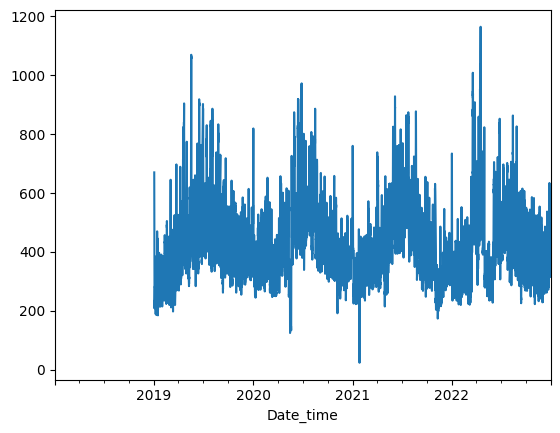

In [40]:
(x + y ).Calls.rolling(24).sum().plot()

In [13]:
for df in [innlandet_112, innlandet_02, sorost_112, sorost_02]:
    print(round(100*len(df.loc[df.Missdialed == 1])/len(df),2))

21.92
9.16
20.87
26.62
